<div align="center">
  <h1><strong>Tugas Besar Mata Kuliah Data Mining 2024</strong></h1>
  <h2><strong>Kelompok 2 ✌🏻</strong></h2>
  <table style="margin-top: 50px; margin-bottom: 30px; width: 80%; text-align: center;">
    <tr>
      <th>Nama Anggota</th>
      <th>NIM</th>
    </tr>
    <tr>
      <td>Alvaro Cleosanda</td>
      <td>1202220181</td>
    </tr>
    <tr>
      <td>Vilson</td>
      <td>120222xxxx</td>
    </tr>
    <tr>
      <td>Alisha Deanova Oemar</td>
      <td>120222xxxx</td>
    </tr>
    <tr>
      <td>Puja Daffa Adilah</td>
      <td>120222xxxx</td>
    </tr>
  </table>
</div>

<br>

---

<div align="center">
  <h1><strong>💵 Employee Demographics and Income Prediction 💵</strong></h1>
</div>
<br>

Proyek ini mengeksplorasi **Dataset Demografi Karyawan dan Prediksi Pendapatan**, yang dirancang untuk menganalisis berbagai faktor yang memengaruhi pendapatan, status kerja, dan karakteristik pekerjaan. Dataset ini mencakup fitur-fitur seperti tahun kelahiran, tingkat pendidikan, kelas pekerjaan, jam kerja mingguan, dan kategori pendapatan, memberikan dasar yang kuat untuk mengeksplorasi pola dalam pekerjaan dan distribusi upah.

## 📚 **Latar Belakang Masalah**
Kesenjangan pendapatan dan faktor demografi memainkan peran penting dalam membentuk tenaga kerja. Dengan meneliti karakteristik karyawan dan pendapatan, proyek ini bertujuan untuk mengidentifikasi faktor-faktor kunci yang memengaruhi penghasilan, jenis pekerjaan, dan aspek lain dari tenaga kerja. Dataset ini membantu mengungkap wawasan tentang bagaimana pendidikan, jam kerja, dan demografi berkaitan dengan kategori pendapatan, memungkinkan pemahaman yang lebih mendalam tentang distribusi upah dan tren pekerjaan.

## 📊 **Gambaran Umum Dataset**
Dataset yang digunakan dalam proyek ini terdiri dari fitur-fitur yang terkait dengan demografi karyawan dan karakteristik pekerjaan. Berikut adalah fitur-fitur utama yang termasuk dalam dataset:

- **Tahun Kelahiran**: Tahun kelahiran pekerja, direpresentasikan sebagai angka.
- **Kelas Pekerjaan**: Kelas atau jenis pekerjaan (misalnya, pemerintahan, sektor swasta).
- **FNLWGT**: Bobot akhir yang mewakili jumlah orang dengan karakteristik yang sama dengan pekerja.
- **Pendidikan**: Tingkat pendidikan tertinggi yang dicapai.
- **Jenjang Pendidikan**: Tingkat pendidikan (misalnya, SMA, perguruan tinggi).
- **Status**: Status pernikahan pekerja.
- **Pekerjaan**: Pekerjaan atau profesi spesifik.
- **Hubungan**: Status hubungan dalam keluarga (misalnya, suami, istri).
- **Etnis**: Etnis pekerja.
- **Jenis Kelamin**: Jenis kelamin pekerja.
- **Pendapatan**: Pendapatan dalam dolar.
- **Pengeluaran**: Pengeluaran terkait dengan persyaratan pekerjaan.
- **Hours-per-week**: Jumlah jam kerja per minggu.
- **Asal Negara**: Negara asal pekerja.
- **Income**: Kategori pendapatan pekerja, baik ≤50K atau >50K.
- **Jumlah Anak**: Jumlah anak yang dimiliki pekerja.
<br>

---

# Load Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

style = 'ggplot'
plt.style.use(style)

pd.set_option('display.max_colwidth', None)

# Load Dataset

In [2]:
df_train = pd.read_csv('train.csv')


In [3]:
df_train

,ID,Tahun Kelahiran,Kelas Pekerjaan,fnlwgt,Pendidikan,Jenjang Pendidikan,Status,Pekerjaan,Hubungan,Etnis,sex,pendapatan,pengeluaran,hours per week,Asal Negara,jumlah_anak,income
0,478,1992,Swasta,37210,Sarjana,Sarjana,Menikah,Eksekutif Manager,Suami,1,Male,0,0,45,United-States,2,>50K
1,479,1981,Swasta,101950,Magister,Magister,Belum-menikah,Eksekutif Manager,Tidak dalam Keluarga,1,Female,0,0,45,United-States,0,<=50K
2,480,2004,NaN,122244,SMA Grad,SMA Grad,Belum-menikah,NaN,Tidak dalam Keluarga,1,Female,0,0,28,United-States,0,<=50K
3,481,1984,Pemerintah daerah,24763,Diploma,Kuliah,Cerai,Transportasi dan Pengangkutan,Belum Menikah,1,Male,6849,0,40,United-States,0,<=50K
4,482,2000,Swasta,113936,Sarjana,Sarjana,Belum-menikah,Spesialis Profesional,Punya Anak,1,Male,0,0,40,United-States,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26064,26542,1995,Swasta,134890,Asosiasi vokasional,vokasi Grad_2,Menikah,Pertanian dan Perikanan,Suami,1,Male,0,0,40,United-States,2,>50K
26065,26543,1975,Swasta,54772,SMA Grad,SMA Grad,Menikah,Pekerjaan Kerajinan,Suami,1,Male,3103,0,45,United-States,1,>50K
26066,26544,1976,Swasta,249935,SMA Grad,SMA Grad,Menikah,Transportasi dan Pengangkutan,Suami,1,Male,0,0,44,United-States,3,<=50K
26067,26545,1993,Swasta,126501,Diploma,Kuliah,Menikah,Pekerjaan Kerajinan,Suami,1,Male,0,0,40,United-States,1,<=50K


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26069 entries, 0 to 26068
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  26069 non-null  int64 
 1   Tahun Kelahiran     26069 non-null  int64 
 2   Kelas Pekerjaan     24594 non-null  object
 3   fnlwgt              26069 non-null  int64 
 4   Pendidikan          26069 non-null  object
 5   Jenjang Pendidikan  26069 non-null  object
 6   Status              26069 non-null  object
 7   Pekerjaan           24588 non-null  object
 8   Hubungan            26069 non-null  object
 9   Etnis               26069 non-null  int64 
 10  sex                 26069 non-null  object
 11  pendapatan          26069 non-null  int64 
 12  pengeluaran         26069 non-null  int64 
 13  hours per week      26069 non-null  int64 
 14  Asal Negara         26069 non-null  object
 15  jumlah_anak         26069 non-null  int64 
 16  income              26

Numeric Data

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,26069.0,13512.000000,7525.616420,478.0,6995.0,13512.0,20029.0,26546.0
Tahun Kelahiran,26069.0,1985.408301,13.641728,1934.0,1976.0,1987.0,1996.0,2007.0
fnlwgt,26069.0,190016.949442,105538.406536,12285.0,118212.0,178564.0,237466.0,1484705.0
Etnis,26069.0,1.220952,0.628748,1.0,1.0,1.0,1.0,5.0
pendapatan,26069.0,1060.329088,7296.372379,0.0,0.0,0.0,0.0,99999.0
pengeluaran,26069.0,88.028309,404.983666,0.0,0.0,0.0,0.0,4356.0
hours per week,26069.0,40.480724,12.414788,1.0,40.0,40.0,45.0,99.0
jumlah_anak,26069.0,1.009820,1.156031,0.0,0.0,1.0,2.0,3.0


Categorical Data

In [6]:
df_train.describe(include='O').T

,count,unique,top,freq
Kelas Pekerjaan,24594,8,Swasta,18114
Pendidikan,26069,16,SMA Grad,8387
Jenjang Pendidikan,26069,16,SMA Grad,8387
Status,26069,7,Menikah,12012
Pekerjaan,24588,14,Spesialis Profesional,3324
Hubungan,26069,6,Suami,10598
sex,26069,2,Male,17449
Asal Negara,26069,42,United-States,23355
income,26069,2,<=50K,19790


Unique Values from the categorical values

In [7]:
# Get unique values for each categorical column
unique_values = {}
for col in df_train.select_dtypes(include='object').columns:
    unique_values[col] = df_train[col].unique()

# Create a dataframe from unique values
unique_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique_Values'])

print("Unique Values per Categorical Column:")
unique_df

Unique Values per Categorical Column:


,Column,Unique_Values
0,Kelas Pekerjaan,"[Swasta, nan, Pemerintah daerah, Pengusaha berbadan hukum, Pemerintah pusat, Pengusaha perorangan, Pemerintah negara, Tanpa bayaran, Tidak bekerja]"
1,Pendidikan,"[Sarjana, Magister, SMA Grad, Diploma, Asosiasi akademik, kelas 10, kelas 9, kelas 7-8, Asosiasi vokasional, kelas 11, kelas 5-6, Proffesor, kelas 12, Doktor, kelas 1-4, TK]"
2,Jenjang Pendidikan,"[Sarjana, Magister, SMA Grad, Kuliah, vokasi Grad_1, SMA_1, SMP_2, SMP_1, vokasi Grad_2, SMA_2, SD_2, Doktor, SMA_3, Proffesor, SD_1, TK]"
3,Status,"[Menikah, Belum-menikah, Cerai, Duda/Janda, Rencana Cerai, Menikahi tentara, LDM]"
4,Pekerjaan,"[Eksekutif Manager, nan, Transportasi dan Pengangkutan, Spesialis Profesional, Dukungan Teknis, Pekerjaan Kerajinan, Sales, Layanan Lainnya, Pengelola Kebersihan, Inspeksi dan Operasi Mesin, Pertanian dan Perikanan, Administratif dan Kantor, Layanan Perlindungan, Pembantu Rumah Tangga, Angkatan Bersenjata]"
5,Hubungan,"[Suami, Tidak dalam Keluarga, Belum Menikah, Punya Anak, Istri, Kerabat]"
6,sex,"[Male, Female]"
7,Asal Negara,"[United-States, ?, Poland, Germany, Trinadad&Tobago, Mexico, Columbia, Greece, Japan, France, Hungary, Taiwan, Dominican-Republic, El-Salvador, England, Cambodia, Portugal, Vietnam, Cuba, Philippines, Haiti, Scotland, Jamaica, Peru, Puerto-Rico, China, Ecuador, India, Canada, South, Guatemala, Thailand, Iran, Italy, Hong, Yugoslavia, Nicaragua, Ireland, Outlying-US(Guam-USVI-etc), Honduras, Holand-Netherlands, Laos]"
8,income,"[>50K, <=50K]"


Null Values

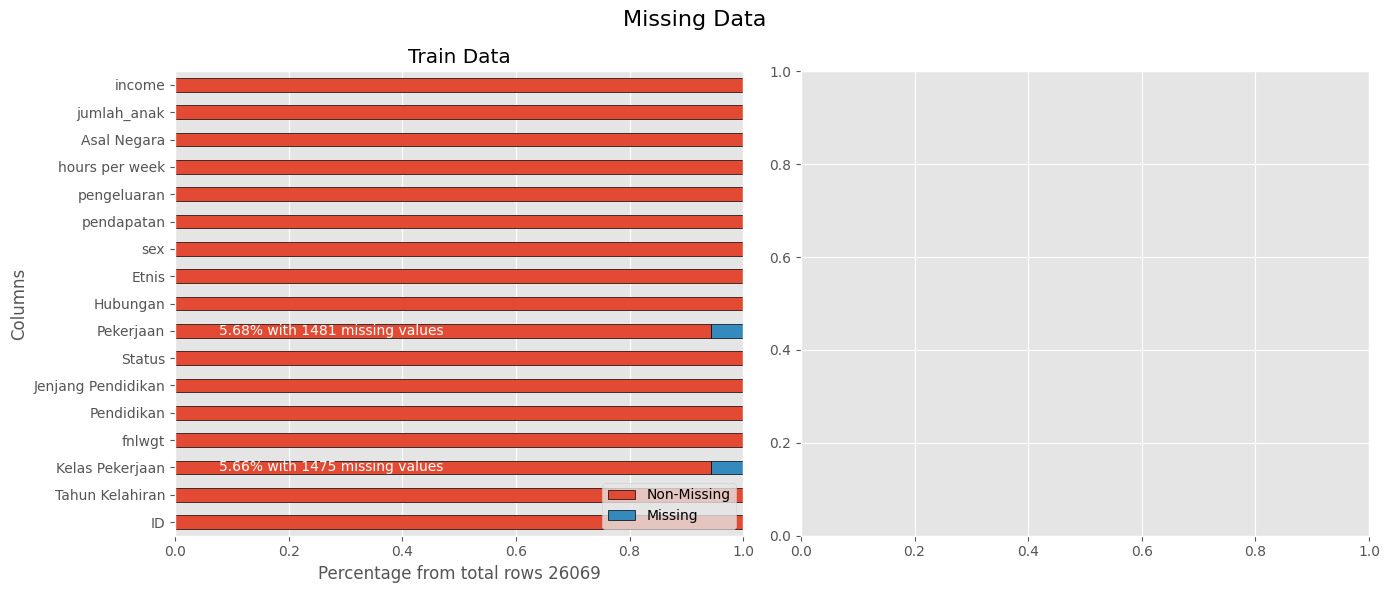

In [8]:
missingdf = [(df_train, 'Train Data')]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('Missing Data', fontsize=16)

for ax, (df, title) in zip(axes, missingdf):
    # Calculate the percentage of missing and non-missing values
    missing_percentage = df.isnull().mean()
    extant_percentage = 1 - missing_percentage

    # Combine them into a DataFrame
    percentage_df = pd.DataFrame({
        'Non-Missing': extant_percentage,
        'Missing': missing_percentage
    })

    # Plot the stacked bar chart
    percentage_df.plot(kind='barh', stacked=True, edgecolor='black', ax=ax)

    # Adding title and labels
    ax.set_title(title)
    ax.set_xlabel(f'Percentage from total rows {df.shape[0]}') 
    ax.set_ylabel('Columns')
    ax.set_xlim(0, 1)
    ax.legend(loc='lower right')

    # Adding text labels on the bars for missing values
    for i, missing_val in enumerate(percentage_df['Missing']):
        if missing_val > 0:
            ax.text(missing_val + 0.02, i, f'{missing_val:.2%} with {int(missing_val * df.shape[0])} missing values', va='center', color = 'white')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
#Di kolom Asal Negara juga terdapat null values tetapi dalam bentuk yang berbeda yaitu '?'
df_train[df_train['Asal Negara'] == '?'].shape

(458, 17)

Duplicated Rows

In [10]:
# Show count of duplicated rows
print(f'Duplicated rows in train data: {df_train.duplicated().sum()}')

Duplicated rows in train data: 0


Target Variable Distribution

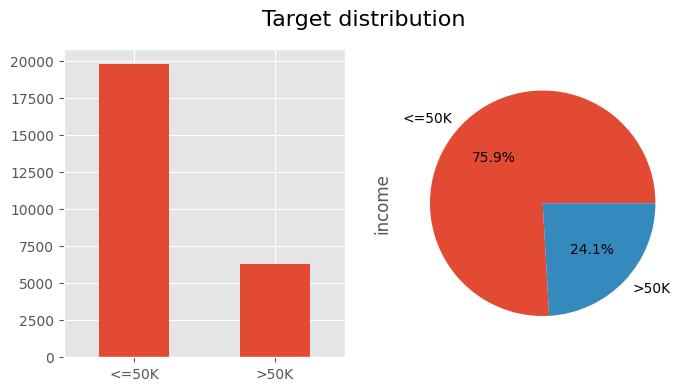

In [11]:
# Plot the target distribution with bar and pie chart
plt.figure(figsize=(8, 4))
plt.suptitle('Target distribution', fontsize=16)
# Bar chart

plt.subplot(1, 2, 1)
df_train['income'].value_counts().plot(kind='bar', rot=0)

# Pie chart
plt.subplot(1, 2, 2)
df_train['income'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.show()

In [12]:
df_train['income'] = df_train['income'].replace({'<=50K': 0, '>50K': 1})

# EDA

Categorical Features

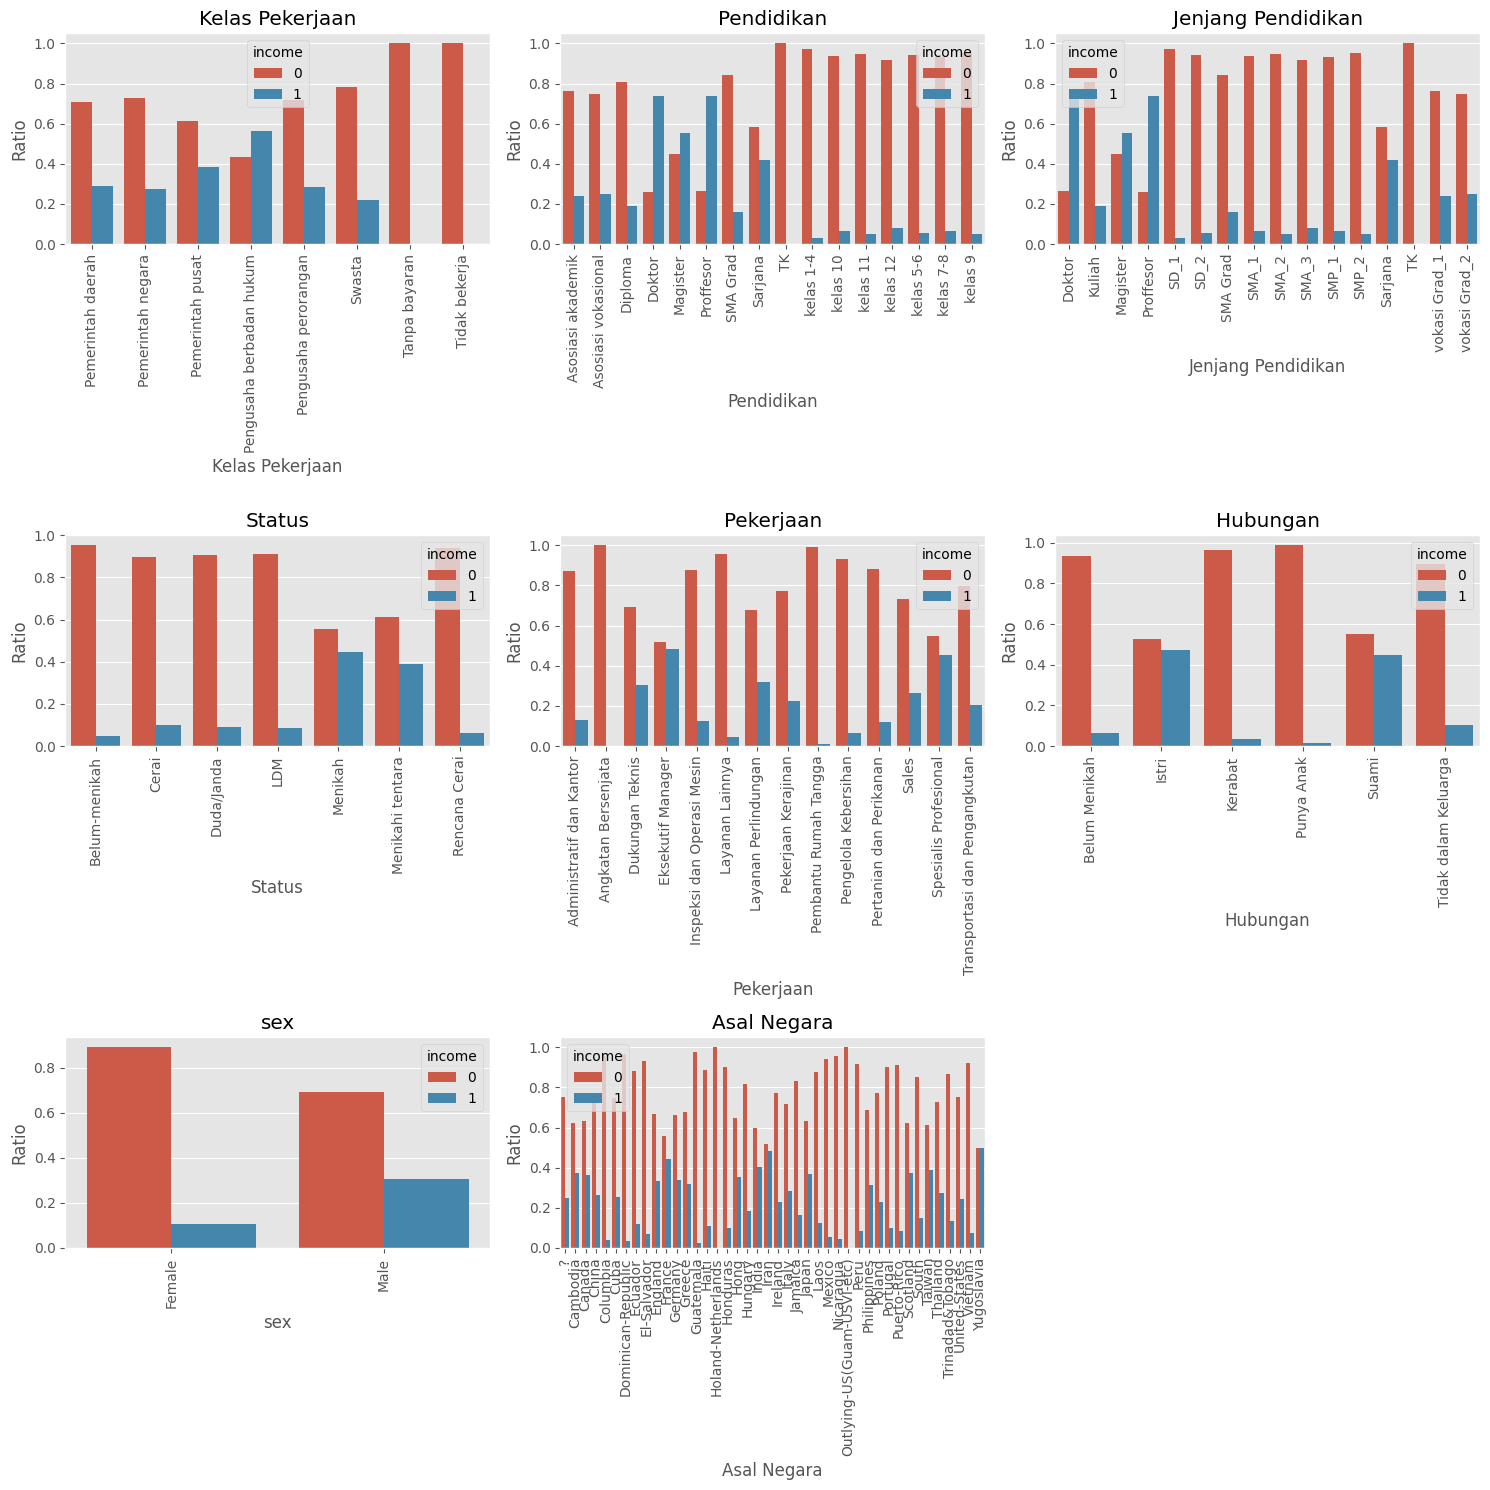

In [13]:
def countplot_on_income_grid_as_ratio(df):
    # Mendapatkan semua kolom bertipe 'object' (kecuali 'income' jika ada)
    object_columns = [col for col in df.select_dtypes(include='object').columns if col != 'income']
    
    n_cols = 3  # Menentukan jumlah kolom dalam grid
    n_rows = (len(object_columns) + n_cols - 1) // n_cols  # Menghitung jumlah baris yang dibutuhkan
    
    # Mengatur ukuran figure
    plt.figure(figsize=(n_cols * 5, n_rows * 5))
    
    # Loop melalui semua kolom bertipe 'object' dan buat barplot untuk rasio masing-masing
    for index, col in enumerate(object_columns):
        # Menghitung proporsi setiap kategori dalam kolom berdasarkan 'income'
        prop_df = df.groupby([col, 'income']).size().reset_index(name='count')
        total_df = df.groupby(col).size().reset_index(name='total')
        merged_df = pd.merge(prop_df, total_df, on=col)
        merged_df['ratio'] = merged_df['count'] / merged_df['total']
        
        plt.subplot(n_rows, n_cols, index + 1)  # Menentukan posisi subplot
        sns.barplot(x=col, y='ratio', hue='income', data=merged_df)
        plt.xticks(rotation=90)
        plt.title(col)
        plt.ylabel('Ratio')
        plt.tight_layout()

    plt.show()

# Contoh penggunaan
countplot_on_income_grid_as_ratio(df_train)

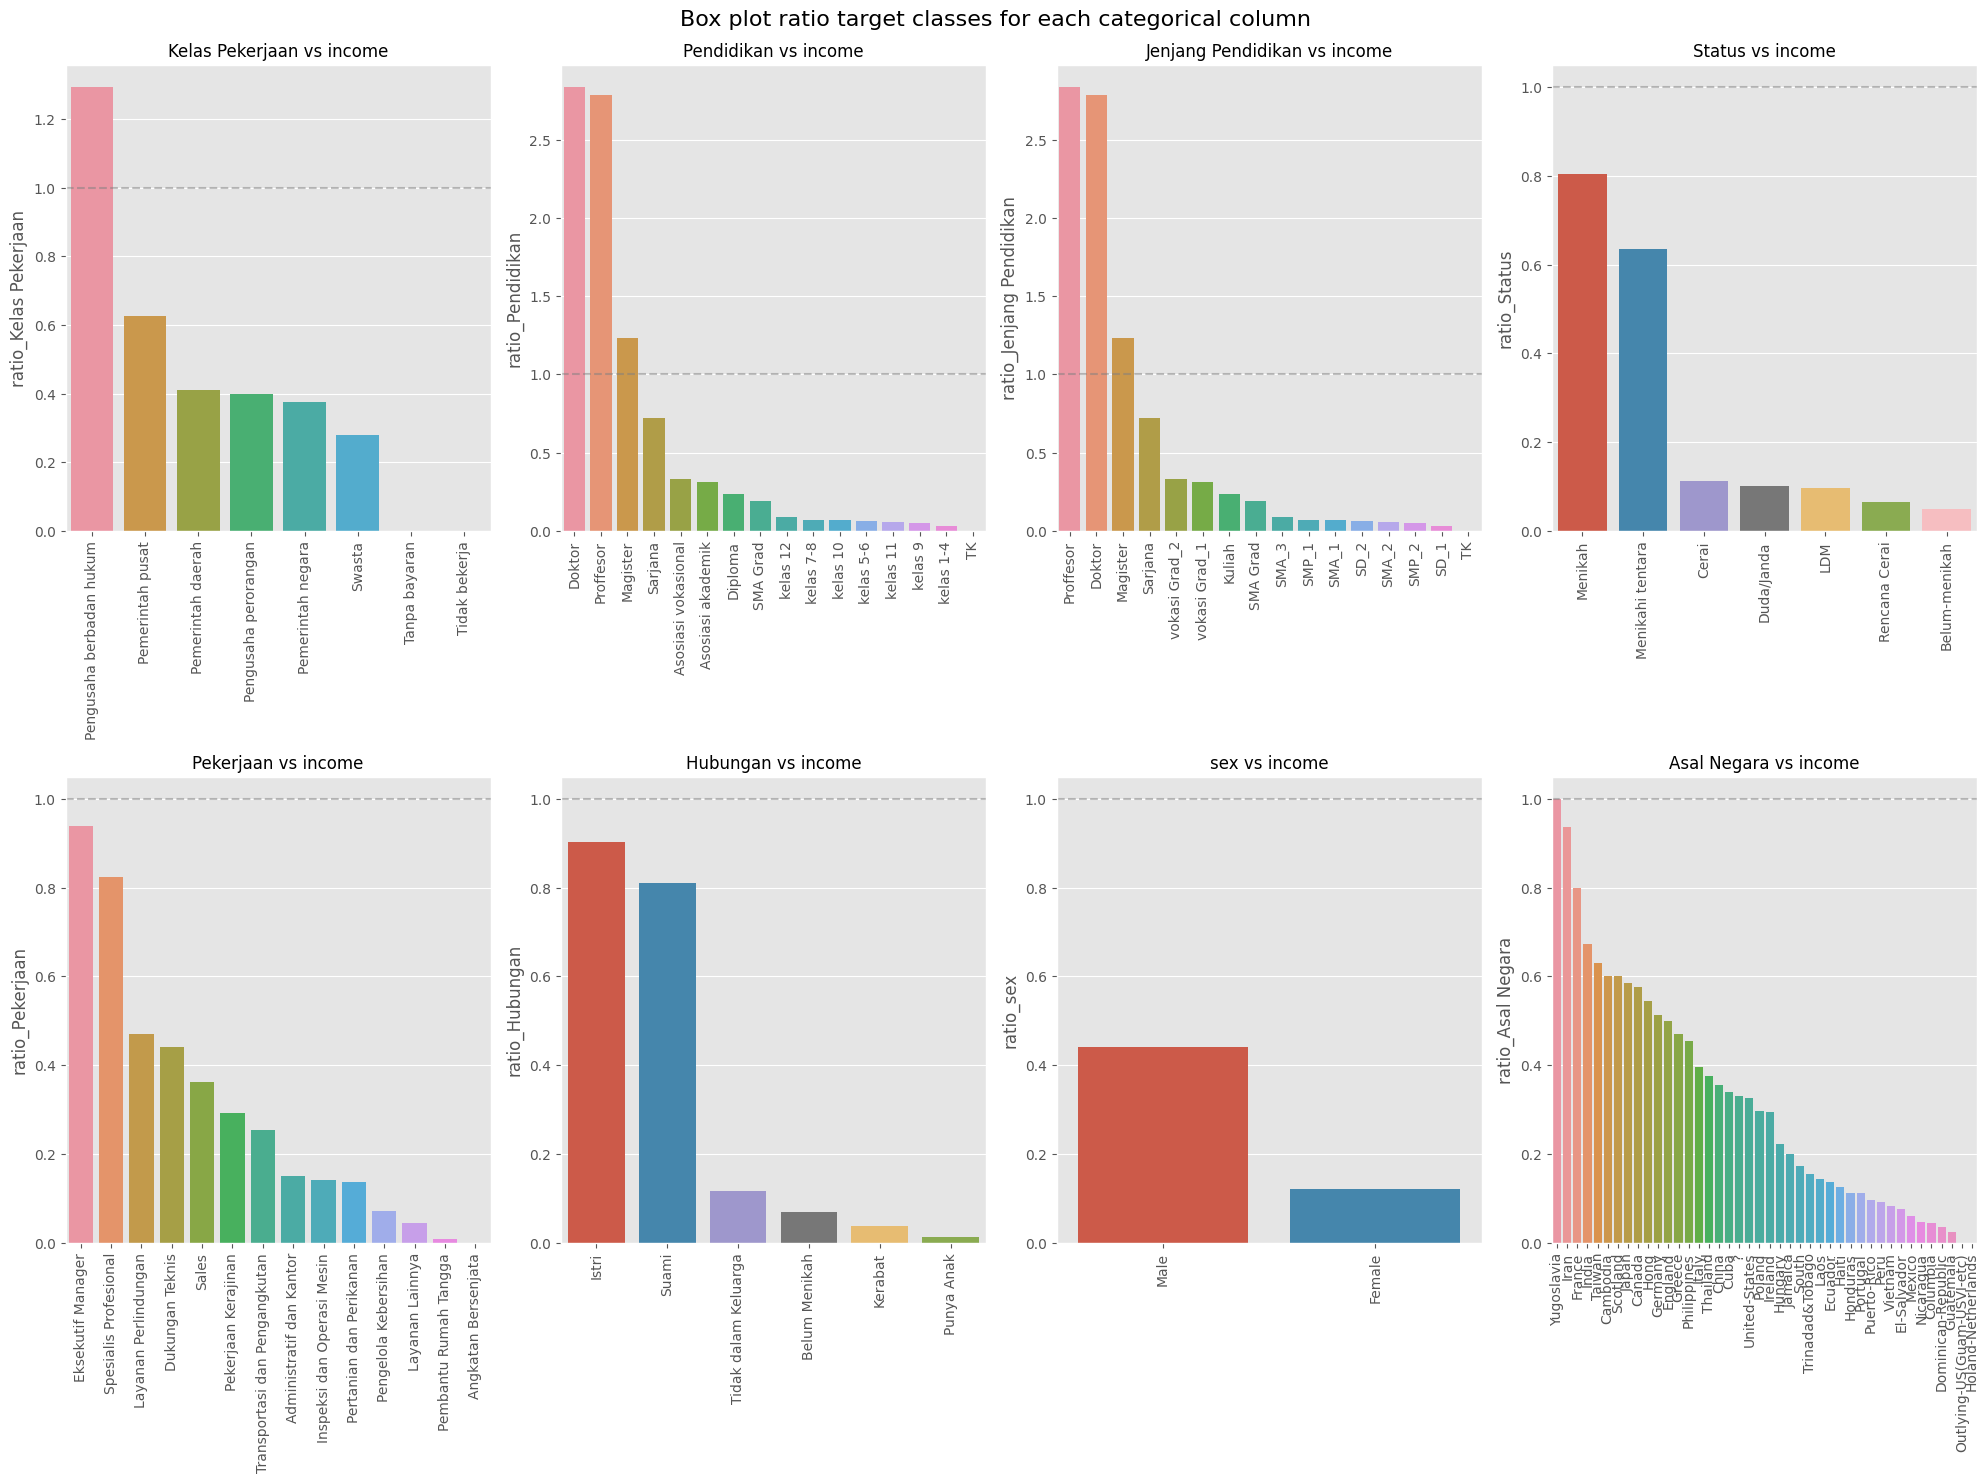

In [14]:
# Count plot the ratio between target classes for each categorical column
plt.figure(figsize=(20, 20))
plt.suptitle('Box plot ratio target classes for each categorical column\n', fontsize=16)

for i, col in enumerate(df_train.select_dtypes(include='object').columns, 1):
    plt.subplot(3, 4, i)
    frequency_df = df_train.groupby([col, 'income']).size().unstack(fill_value=0)
    frequency_df[f'ratio_{col}'] = frequency_df[1] / frequency_df[0]
    frequency_df = frequency_df.sort_values(by=f'ratio_{col}', ascending=False)
    plt.title(f'{col} vs income', fontsize=12)
    sns.barplot(data=frequency_df, x=frequency_df.index, y=frequency_df[f'ratio_{col}'])
    plt.axhline(1, color='grey', linestyle='--', alpha=0.5)

    plt.xlabel('')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Insight Berdasarkan Visualisasi Data

Berdasarkan analisis visual dari beberapa kolom kategori terhadap variabel target `income`, kami dapat mengambil beberapa insight yang dapat menyederhanakan dan mungkin meningkatkan kinerja model machine learning:

1. **Kolom Pendidikan**:
   - Berdasarkan rasio individu dengan `income = 1` pada berbagai kategori pendidikan, terlihat pola yang jelas. Kita bisa mengelompokkan kolom `Pendidikan` menjadi tiga kelas:
     - **Rendah**: Kategori di mana rasio `income = 1` relatif rendah, yang menunjukkan potensi pendapatan yang lebih rendah (TK, kelas 1-4, kelas 10, kelas 11, kelas 12, kelas 5-6, kelas 7-8, kelas 9).
     - **Menengah**: Kategori dengan rasio `income = 1` yang sedang, menunjukkan potensi pendapatan menengah (Asosiasi akademik, Asosiasi vokasional, Sarjana, SMA Grad, Diploma).
     - **Tinggi**: Kategori dengan rasio `income = 1` yang tinggi, menunjukkan potensi pendapatan yang lebih tinggi (Doktor, Magister, Proffesor).

2. **Kolom Jenjang Pendidikan**:
   - Sama seperti kolom `Pendidikan`, kolom `Jenjang Pendidikan` juga dapat dibagi menjadi tiga kelas berdasarkan rasio `income = 1`. Ini bisa membantu dalam mengelompokkan tingkat pendidikan yang berhubungan dengan potensi pendapatan lebih tinggi atau lebih rendah.

3. **Kolom Hubungan**:
   - Kolom `Hubungan` dapat disederhanakan menjadi dua kategori: 
     - **Suami atau Istri**: Individu yang berstatus sebagai suami atau istri, yang cenderung memiliki rasio `income = 1` lebih tinggi.
     - **Bukan Suami atau Istri**: Individu dengan status lain seperti belum menikah, yang memiliki rasio `income = 1` lebih rendah.

4. **Kolom Status**:
   - Kolom `Status` bisa dibagi menjadi dua kategori besar:
     - **Menikah**: Termasuk individu yang berstatus menikah atau pernah menikah.
     - **Belum Menikah**: Termasuk individu yang belum pernah menikah. 
     - Hal ini didasarkan pada rasio yang menunjukkan bahwa individu yang menikah cenderung memiliki rasio `income = 1` lebih tinggi.

5. **Kelas Pekerjaan dan Pekerjaan**:
   - Dari kedua grafik ini terlihat bahwa semakin tinggi jabatan atau kelas pekerjaan seseorang, semakin tinggi pula rasio orang tersebut memiliki pendapatan yang lebih besar (`income = 1`).
   - Contohnya, **pengusaha besar di bidang hukum** dan **eselon/profesor** memiliki rasio pendapatan tinggi yang jauh lebih besar dibandingkan kelas pekerjaan lain seperti **pegawai administrasi** atau **buruh**.
   - Kategori jabatan tinggi seperti **pemerintah pusat** dan **pengusaha besar di berbagai sektor** juga menunjukkan rasio `income = 1` yang lebih tinggi dibandingkan kategori pekerjaan dengan otoritas yang lebih rendah seperti **pekerjaan tanpa bayaran** atau **pekerjaan sektor lain yang lebih rendah**.

Numerical Features

In [15]:
# Separate the data based on income levels
poor = df_train[df_train['income'] == 0].drop(['ID', 'income'], axis=1)
rich = df_train[df_train['income'] == 1].drop(['ID', 'income'], axis=1)

# Get the numerical columns
columns = poor.select_dtypes(include=['int64', 'float64']).columns

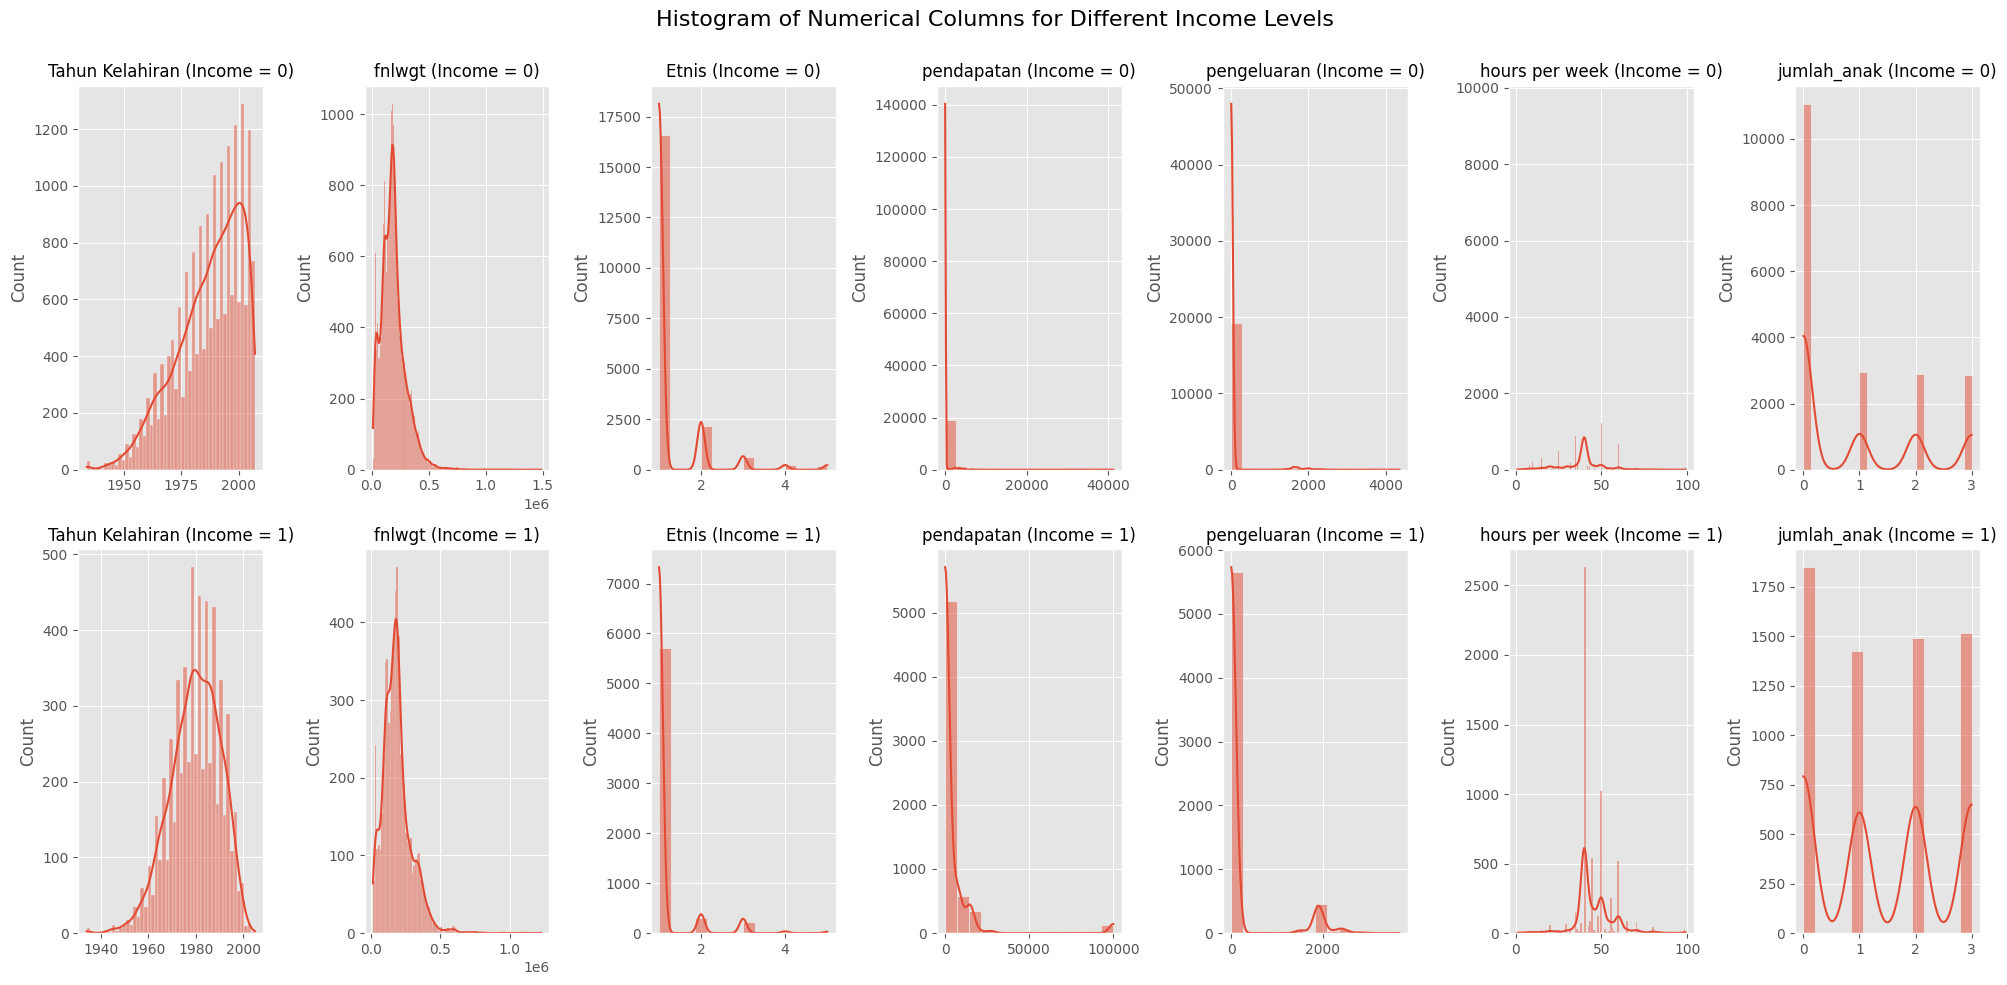

In [16]:
plt.figure(figsize=(20, 10))
plt.suptitle('Histogram of Numerical Columns for Different Income Levels\n', fontsize=16)

for i, column in enumerate(columns, 1):
    for j, (data, income_label) in enumerate(zip([poor, rich], ['0', '1'])):
        plt.subplot(2, len(columns), i + j * len(columns))
        plt.title(f'{column} (Income = {income_label})', fontsize=12)
        sns.histplot(data[column], kde=True)
        plt.xlabel('')

plt.tight_layout()
plt.show()


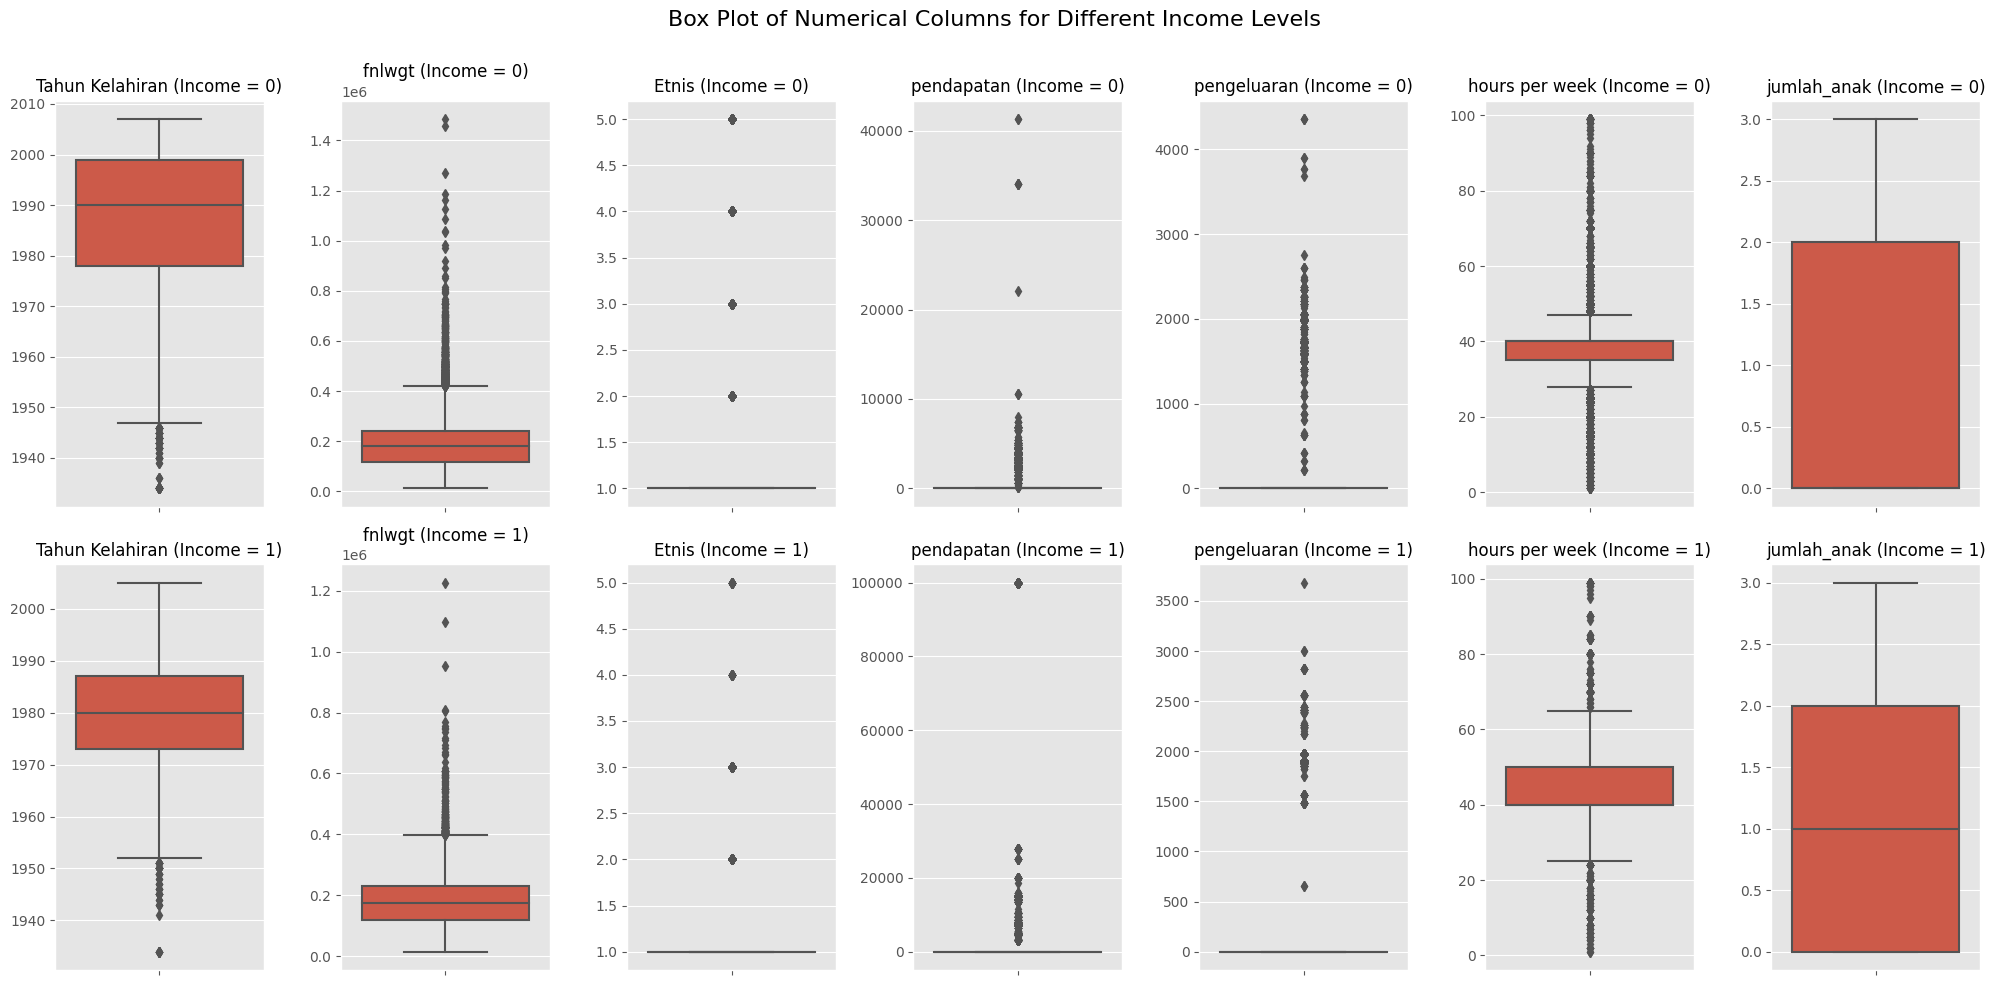

In [17]:
plt.figure(figsize=(20, 10))
plt.suptitle('Box Plot of Numerical Columns for Different Income Levels\n', fontsize=16)

for i, column in enumerate(columns, 1):
    for j, (data, income_label) in enumerate(zip([poor, rich], ['0', '1'])):
        plt.subplot(2, len(columns), i + j * len(columns))
        plt.title(f'{column} (Income = {income_label})', fontsize=12)
        sns.boxplot(data=data, y=column)
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

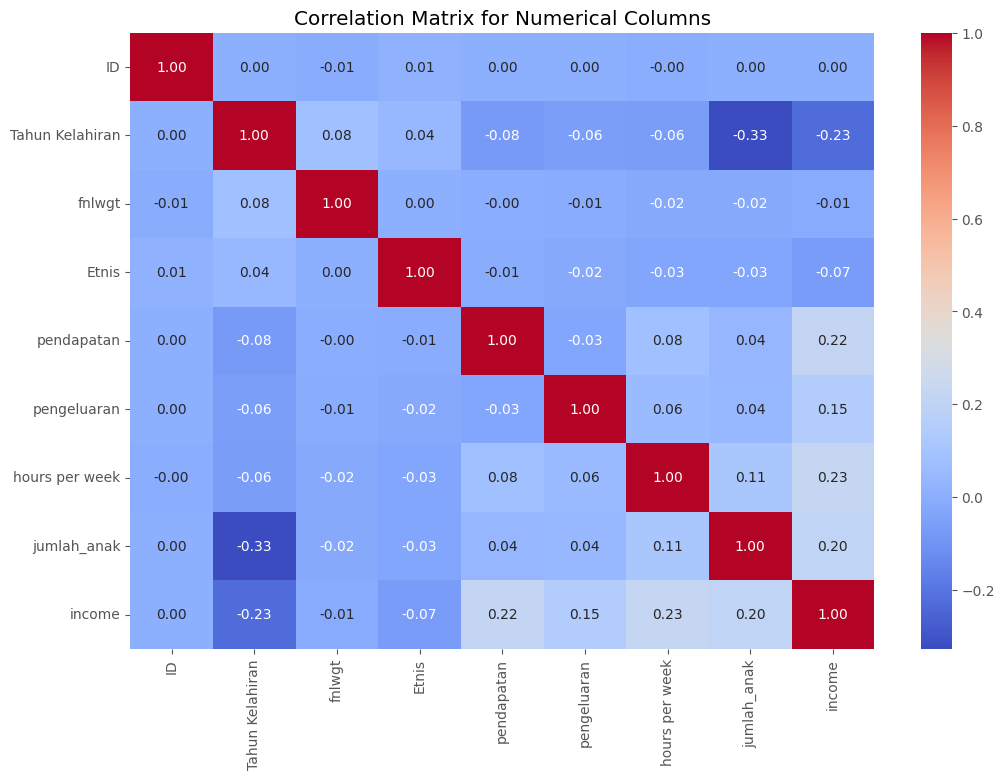

In [18]:
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns 
correlation_matrix = df_train[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


### Insight untuk numerical columns

1. **Kolom ID dan fnlwgt**: 
   - Kolom `ID` dan `fnlwgt` tidak memiliki korelasi yang signifikan terhadap kolom target (`income`). 
   - Karena kedua kolom ini tidak memberikan informasi yang berarti untuk memprediksi nilai target (`income`), maka disarankan untuk melakukan drop terhadap kedua kolom ini dari dataset.


# Preprocessing

**Handling Null Values**

Preprocessing steps ini dilakukan untuk menangani missing values dalam dataset dengan mengisi nilai yang hilang menggunakan modus dari kolom yang bersangkutan. Tujuan dari langkah-langkah ini adalah memastikan tidak ada missing values dalam dataset yang bisa mengganggu proses pelatihan model machine learning. 

In [19]:
# fill all missing values with mode
df_train['Kelas Pekerjaan'] = df_train['Kelas Pekerjaan'].replace(pd.NaT, df_train['Kelas Pekerjaan'].mode()[0])
df_train['Pekerjaan'] = df_train['Pekerjaan'].replace(pd.NaT, df_train['Pekerjaan'].mode()[0])
df_train['Asal Negara'] = df_train['Asal Negara'].replace('?', df_train['Asal Negara'].mode()[0])


**Drop kolom yang tidak memiliki korelasi terhadap target variable**

Menghilangkan kolom yang tidak memiliki korelasi atau kontribusi signifikan terhadap variabel target, sehingga model machine learning dapat fokus pada fitur-fitur yang lebih relevan, meningkatkan efisiensi dan akurasi.

In [20]:
df_train.drop(columns=['ID','fnlwgt'], inplace=True)

**Kolom Tahun Kelahiran**

Mengubah data tahun kelahiran menjadi umur untuk mempermudah analisis dan meningkatkan interpretabilitas model. Menghapus kolom 'Tahun Kelahiran' karena informasi yang diperlukan telah direpresentasikan dalam kolom 'Umur'.

In [21]:
#convert tahun kelahiran menjadi umur

df_train['Umur'] = 2024 - df_train['Tahun Kelahiran']
df_train.drop(columns=['Tahun Kelahiran'], inplace=True)

**Kolom Pendidikan**

Mengelompokan nilai pada kolom Pendidikan menjadi tiga kategori berdasarkan rasio individu dengan income = 1 . Ini dilakukan untuk menyederhanakan kategori pendidikan menjadi fitur yang lebih mudah dianalisis

In [22]:
# Group values pada kolom pendidikan menjadi 3 kategori
df_train['Pendidikan'].replace(['TK', 'kelas 1-4', 'kelas 10', 'kelas 11', 'kelas 12', 'kelas 5-6', 'kelas 7-8', 'kelas 9'], 0, inplace=True)
df_train['Pendidikan'].replace(['Doktor', 'Magister', 'Proffesor'], 2, inplace=True)
df_train['Pendidikan'].replace(['Asosiasi akademik', 'Asosiasi vokasional', 'Sarjana', 'SMA Grad', 'Diploma'], 1, inplace=True)


**Kolom Status**

Langkah preprocessing ini dilakukan untuk menyederhanakan kolom Status dengan mengelompokkan berbagai kategori status pernikahan menjadi dua kategori utama: "Married" dan "Not Married".

In [23]:
# Group values pada kolom Status menjadi 2 kategori
df_train['Status'].replace(['Menikah', 'Menikahi tentara'], 'Married', inplace=True)
df_train['Status'].replace(['Belum-menikah', 'Cerai', 'Duda/Janda', 'LDM', 'Rencana Cerai'], 'Not Married', inplace=True)


**Kolom Hubungan**

Langkah preprocessing ini mengelompokkan nilai pada kolom Hubungan menjadi dua kategori utama: "is husband or wife" dan "is not husband or wife". 

In [24]:
# Group values pada kolom Hubungan menjadi 2 kategori

df_train['Hubungan'].replace(['Istri', 'Suami'], 'is husband or wife', inplace=True)
df_train['Hubungan'].replace(['Belum Menikah', 'Kerabat', 'Punya Anak', 'Tidak dalam Keluarga'], 'is not husband or wife', inplace=True)


**Kolom Pendapatan dan Pengeluaran**

Langkah-langkah preprocessing ini bertujuan untuk menciptakan kolom baru yang menggambarkan jumlah capital atau modal bersih seseorang dengan mengurangi pengeluaran dari pendapatan.

In [25]:
# Buat Kolom 'capital' dengan mengurangkan kolom 'pendapatan' dengan kolom 'pengeluaran'

df_train['capital'] = df_train['pendapatan'] - df_train['pengeluaran']

df_train.drop(columns=['pendapatan', 'pengeluaran'], inplace=True)

**Kolom Kelas Pekerjaan dan Pekerjaan**

Langkah ini bertujuan untuk mengubah fitur kategorikal Kelas Pekerjaan dan Pekerjaan menjadi fitur numerik yang lebih berguna dalam model prediksi. Dengan mengganti nilai kategori dengan rata-rata pendapatan

In [26]:
# Ganti values pada kolom kelas pekerjaan dan pekerjaan menjadi rata rata dari kolom income

workclass_order = df_train.groupby('Kelas Pekerjaan')['income'].mean().sort_values()

df_train['Kelas Pekerjaan'] = df_train['Kelas Pekerjaan'].map(workclass_order)

joborder = df_train.groupby('Pekerjaan')['income'].mean().sort_values()

df_train['Pekerjaan'] = df_train['Pekerjaan'].map(joborder)


**Kolom Etnis dan Jumlah Anak**

Langkah-langkah preprocessing ini mengubah tipe data kolom Etnis dan jumlah_anak menjadi tipe data kategorikal

In [27]:
# Ubah tipe data kolom Etnis dan Jumlah Anak menjadi kategori

df_train['Etnis'] = df_train['Etnis'].astype('category')

df_train['jumlah_anak'] = df_train['jumlah_anak'].astype('category')


In [28]:
#replace holand-netherlands with mode

df_train['Asal Negara'] = df_train['Asal Negara'].replace('Holand-Netherlands', df_train['Asal Negara'].mode()[0])

**One hot encode kolom categorical**

In [29]:
columns_to_encode = [x for x in df_train.select_dtypes(include=['object', 'category']).columns if x != 'income']
columns_to_encode

#onehotencoder
df_train = pd.get_dummies(df_train, columns=columns_to_encode, drop_first=True)

# Model

Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X = df_train.drop(columns='income')
y = df_train['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Latih dan Evaluasi Model

In [31]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
   
    train_accuracy_f1 = f1_score(y_train, predictions_train) * 100
    test_accuracy_f1 = f1_score(y_test, predictions_test) * 100
    
    print(f"{model_name} F1 Score Training -> {train_accuracy_f1:.2f}%")
    print(f"{model_name} F1 Score Testing -> {test_accuracy_f1:.2f}%")
    
    print(f"{model_name} Confusion Matrix:")
    cm = confusion_matrix(y_test, predictions_test)
    print(cm)
    
    print('-' * 50) 
    return model


In [37]:
#models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

cb_model = train_and_evaluate_model(CatBoostClassifier(verbose=0), 'CatBoost')
xgb_model = train_and_evaluate_model(XGBClassifier(), 'XGBoost')
lr_model = train_and_evaluate_model(LogisticRegression(), 'Logistic Regression')
rf_model = train_and_evaluate_model(RandomForestClassifier(), 'Random Forest')

cb_modelweight = train_and_evaluate_model(CatBoostClassifier(verbose=0,class_weights=[1,1.5]), 'CatBoost')
xgb_modelweight = train_and_evaluate_model(XGBClassifier(scale_pos_weight = 1.5), 'XGBoost')
lr_modelweight = train_and_evaluate_model(LogisticRegression(class_weight={0:1,1:1.5}), 'Logistic Regression')
rf_modelweight = train_and_evaluate_model(RandomForestClassifier(class_weight={0:1,1:1.5}), 'Random Forest')

CatBoost F1 Score Training -> 76.33%
CatBoost F1 Score Testing -> 72.99%
CatBoost Confusion Matrix:
[[3768  223]
 [ 392  831]]
--------------------------------------------------
XGBoost F1 Score Training -> 77.55%
XGBoost F1 Score Testing -> 71.77%
XGBoost Confusion Matrix:
[[3733  258]
 [ 394  829]]
--------------------------------------------------


c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1 Score Training -> 60.66%
Logistic Regression F1 Score Testing -> 61.82%
Logistic Regression Confusion Matrix:
[[3723  268]
 [ 556  667]]
--------------------------------------------------
Random Forest F1 Score Training -> 97.95%
Random Forest F1 Score Testing -> 67.58%
Random Forest Confusion Matrix:
[[3668  323]
 [ 434  789]]
--------------------------------------------------
CatBoost F1 Score Training -> 77.78%
CatBoost F1 Score Testing -> 73.53%
CatBoost Confusion Matrix:
[[3616  375]
 [ 294  929]]
--------------------------------------------------
XGBoost F1 Score Training -> 78.96%
XGBoost F1 Score Testing -> 73.05%
XGBoost Confusion Matrix:
[[3610  381]
 [ 300  923]]
--------------------------------------------------


c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1 Score Training -> 63.95%
Logistic Regression F1 Score Testing -> 64.75%
Logistic Regression Confusion Matrix:
[[3568  423]
 [ 435  788]]
--------------------------------------------------
Random Forest F1 Score Training -> 97.96%
Random Forest F1 Score Testing -> 66.81%
Random Forest Confusion Matrix:
[[3673  318]
 [ 450  773]]
--------------------------------------------------


Train model catboost hanya menggunakan feature yang penting

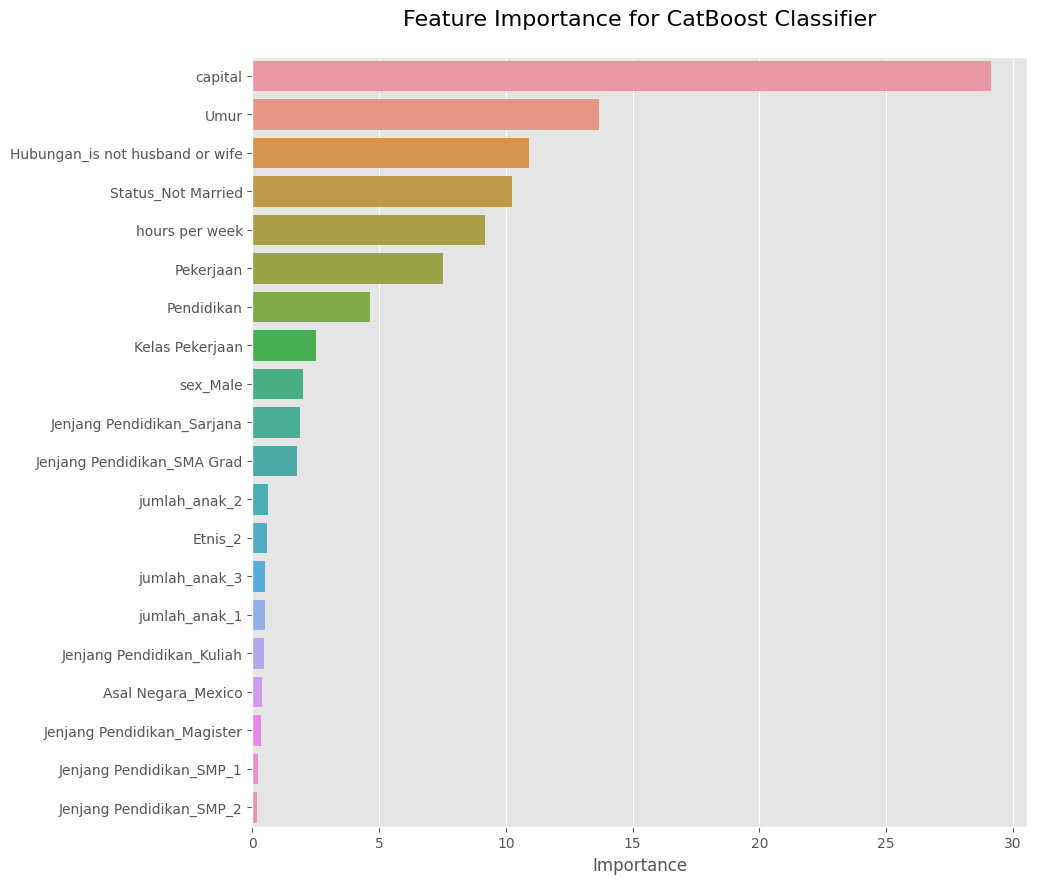

In [33]:
##feature importance for catboost
feature_importance = cb_modelweight.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
plt.title('Feature Importance for CatBoost Classifier\n', fontsize=16)
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Features')
plt.xlabel('Importance')
plt.ylabel('')
plt.show()

In [34]:
#train features only using 10 important features

important_features = feature_importance_df.head(10)['Features'].values

X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

model = CatBoostClassifier(verbose=0, class_weights=[1, 1.5])
model.fit(X_train_important, y_train)
    
predictions_train = model.predict(X_train_important)
predictions_test = model.predict(X_test_important)

train_accuracy_f1 = f1_score(y_train, predictions_train) * 100
test_accuracy_f1 = f1_score(y_test, predictions_test) * 100

print(f"F1 Score Training -> {train_accuracy_f1:.2f}%")
print(f"F1 Score Testing -> {test_accuracy_f1:.2f}%")

print(f"Confusion Matrix:")
cm = confusion_matrix(y_test, predictions_test)
print(cm)


F1 Score Training -> 76.83%
F1 Score Testing -> 73.11%
Confusion Matrix:
[[3612  379]
 [ 300  923]]
